[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Columns in the dataset:
Index(['country', 'date', 'variant', 'reviewTitle', 'reviewDescription'], dtype='object')
Column names in the dataset:
0: country
1: date
2: variant
3: reviewTitle
4: reviewDescription
Using column 'reviewTitle' for review text.
         country        date              variant  \
0  United States  12-04-2024  Intel-core-i5-12000   
1  United States  13-03-2024  Intel-core-i5-12000   
2  United States  26-02-2022  Intel-core-i5-12000   
3  United States  06-11-2023  Intel-core-i5-12000   
4  United States  07-06-2024  Intel-core-i5-12000   

                                     reviewTitle  \
0                                        Amazing   
1                          Very good performance   
2  Solid bang for buck and with a decent cooler.   
3                        Very good for its price   
4                             Excelente producto   

                                   reviewDescription  
0  Great price, great performance, great product....  
1  So

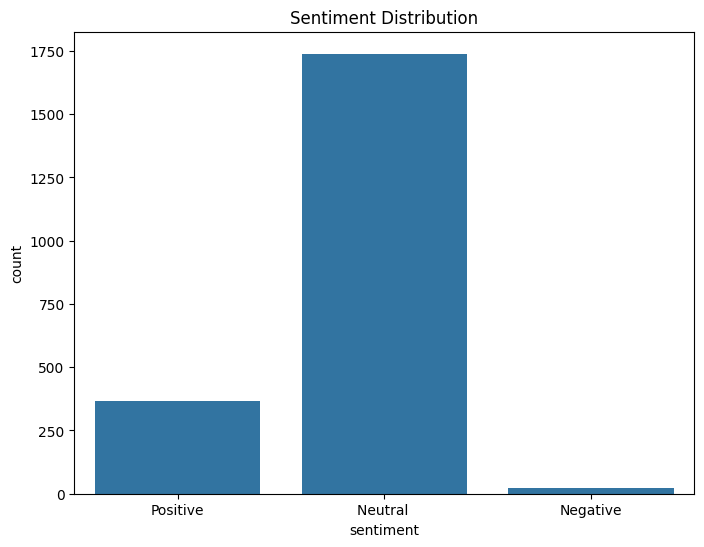

Streaming output truncated to the last 5000 lines.
Review: excelente
Sentiment: Neutral
Compound Score: 0.00
------------------------
Review: still intel fan bought host minecraft server
Sentiment: Neutral
Compound Score: 0.00
------------------------
Review: noisy stock fan otherwise stable fast
Sentiment: Positive
Compound Score: 0.12
------------------------
Review: integrated graphic almost bricked pc unable use
Sentiment: Negative
Compound Score: -0.11
------------------------
Review: stay cool
Sentiment: Positive
Compound Score: 0.23
------------------------
Review: excellent cpu gaming unstable
Sentiment: Positive
Compound Score: 1.00
------------------------
Review: exceeded expectation
Sentiment: Neutral
Compound Score: 0.00
------------------------
Review: problem esxi
Sentiment: Neutral
Compound Score: 0.00
------------------------
Review: マザーボードへの装着
Sentiment: Neutral
Compound Score: 0.00
------------------------
Review: インテルcpuです
Sentiment: Neutral
Compound Score: 0.00
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from textblob import TextBlob
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset
try:
    df = pd.read_csv('/content/Review dataset.csv')
except FileNotFoundError:
    print("Error: The file '/content/Review dataset.csv' was not found.")
    exit(1)

print("Columns in the dataset:")
print(df.columns)

print("Column names in the dataset:")
for i, column in enumerate(df.columns):
    print(f"{i}: {column}")

review_column = None
for column in df.columns:
    if 'review' in column.lower() or 'text' in column.lower():
        review_column = column
        break

if review_column is None:
    raise ValueError("Error: No column resembling 'review' or 'text' found in the dataset.")

print(f"Using column '{review_column}' for review text.")

print(df.head())
print(df.info())
print(df.describe())

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)

df[review_column] = df[review_column].apply(preprocess_text)

print("Sample processed reviews:")
print(df[review_column].head())

df['sentiment_score'] = df[review_column].apply(lambda x: TextBlob(x).sentiment.polarity)

def sentiment_category(score):
    if score > 0.5:
        return 'Positive'
    elif score < -0.5:
        return 'Negative'
    else:
        return 'Neutral '

df['sentiment'] = df['sentiment_score'].apply(sentiment_category)

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

# Calculate the percentage of positive, negative, and average sentiments
positive_pct = (df['sentiment'] == 'Positive').mean() * 100
negative_pct = (df['sentiment'] == 'Negative').mean() * 100
average_pct = (df['sentiment'] == 'Neutral').mean() * 100

print(f'Positive Sentiment: {positive_pct:.2f}%')
print(f'Negative Sentiment: {negative_pct:.2f}%')
print(f'Average Sentiment: {average_pct:.2f}%')

def sentiment_analysis(text):
    if pd.isnull(text):
        return 'Average', 0.0
    analysis = TextBlob(text)
    sentiment = analysis.sentiment
    compound_score = sentiment.polarity * sentiment.subjectivity
    if sentiment.polarity > 0:
        return 'Positive', compound_score
    elif sentiment.polarity < 0:
        return 'Negative', compound_score
    else:
        return 'Neutral', compound_score

df['sentiment_analysis'], df['compound_score'] = zip(*df[review_column].apply(sentiment_analysis))

# Print the sentiment and compound score for each review
for index, row in df.iterrows():
    print(f"Review: {row[review_column]}")
    print(f"Sentiment: {row['sentiment_analysis']}")
    print(f"Compound Score: {row['compound_score']:.2f}")
    print("------------------------")
